In [2]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
from scipy.io import wavfile

fs, som = wavfile.read('elefante.wav')

ipd.Audio(som,rate=fs)

In [3]:
def plot_espectro_Omega(y):
    """ Rotina que exibe o espectro de magnitude (X(e^(jw))) de um sinal discreto em função de Omega"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # frequencias avaliadas (rad)
    w = np.linspace(-np.pi, np.pi, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # centrando fft(y) em 0
    fft_y_center = np.roll(fft_y_norm, fft_y.size//2)

    # exibe o grafico do espectro
    plt.figure() 
    plt.plot(w, fft_y_center)
    plt.xlabel('$\Omega$ [rad]', fontsize=10)
    plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=10)
    plt.grid(True)
    plt.xticks(
        ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
        labels=[r'$-\pi$', r'$-\pi/2$', 0, r'$\pi/2$', r'$\pi$']
    )
    plt.show()


In [120]:
def plot_espectro_Hz(y, Fs, width=14, height=6, show=True, save=None):
    """ Rotina que exibe o espectro de magnitude (X(ejw)) de um sinal discreto em função de Hz"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # frequencias avaliadas (Hz)
    f = np.linspace(0, 2*Fs, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # exibe o grafico do espectro
    fig, ax = plt.subplots(figsize=(width, height))
    ax.plot(f, fft_y_norm)
    plt.xlabel('$f$ [kHz]', fontsize=18)
    plt.ylabel('|$Y(f)$|', fontsize=18)
    ax.grid(True)
    plt.yticks(fontsize=16)
    plt.xticks(
        ticks=[0, Fs//2, Fs, 3*Fs//2, 2*Fs],
        labels=[0, Fs//2//1000, Fs//1000, 3*Fs//2//1000, 2*Fs//1000],
        fontsize=16
    )

    fig.tight_layout()

    if isinstance(save, str):
        fig.savefig(save)

    if show:
        fig.show()

    return fig, ax


<ipython-input-126-c1db1f225465>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


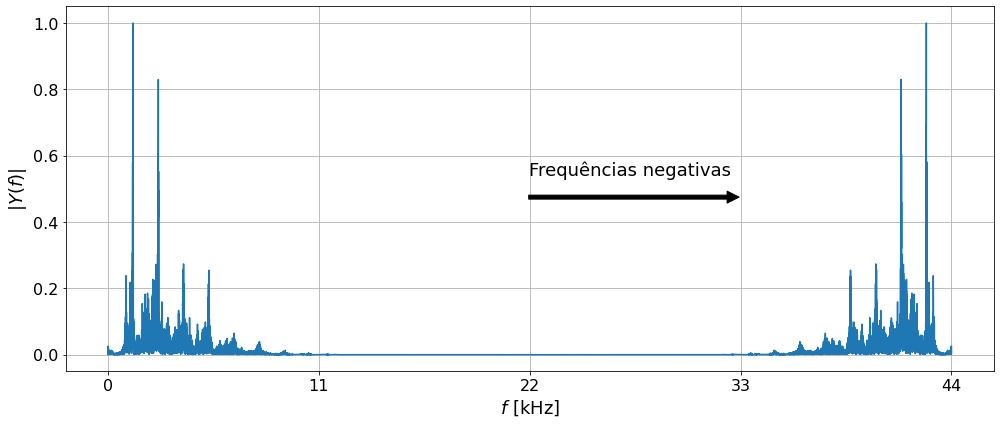

In [126]:
fig, ax = plot_espectro_Hz(
    som,
    fs,
    show=False,
)

ax.annotate('Frequências negativas', (22e3, .54), fontsize=18)
ax.annotate('', (33e3, .475), (22e3, .475), fontsize=18, arrowprops=dict(color='black'))

fig.savefig('espectro_Hz.png')

fig.show()


In [125]:
570/1200

0.475

In [137]:
fft_y = np.abs(np.fft.fft(som))[:len(som)//2+1]
fft_y /= np.max(fft_y)
f = np.linspace(0, fs, fft_y.size)
# plt.plot(f, fft_y)
index_max = np.where(fft_y == np.max(fft_y))[0][0]
index_max2 = np.where(fft_y == np.max(fft_y[index_max + 20:]))[0][0]

print(f[index_max], fft_y[index_max])
print(f[index_max2], fft_y[index_max2])

1312.11017095493 1.0
2637.16629252288 0.8296075475169168


<ipython-input-150-02f0e7ff9bae>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


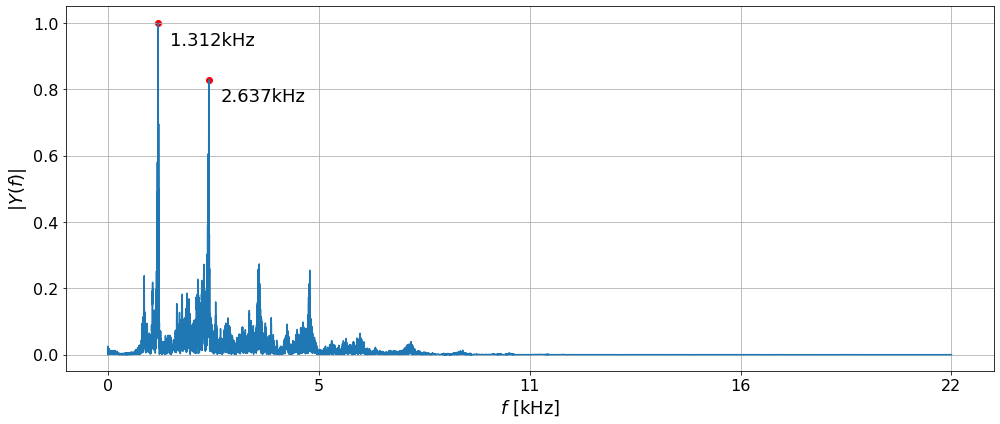

In [150]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f, fft_y)
ax.scatter([f[index_max], f[index_max2]], [fft_y[index_max], fft_y[index_max2]], c='r')
ax.annotate(f'{f[index_max]/1000:.3f}kHz', (f[index_max] + 300, fft_y[index_max] - 2/3/10), fontsize=18)
ax.annotate(f'{f[index_max2]/1000:.3f}kHz', (f[index_max2] + 300, fft_y[index_max2] - 2/3/10), fontsize=18)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[0, fs//4, fs//2, 3*fs//4, fs],
    labels=[0, fs//4//1000, fs//2//1000, 3*fs//4//1000, fs//1000],
    fontsize=16
)
fig.tight_layout()
fig.savefig('max_hz.png')
fig.show()

0.06666666666666667

In [5]:
fft_y_sub = np.abs(np.fft.fft(som[::7]))
fft_y_sub /= np.max(fft_y_sub)
f_sub = np.linspace(0, 2*fs/7, fft_y_sub.size)
# plt.plot(f, fft_y_sub)
index_max = np.where(fft_y_sub == np.max(fft_y_sub))[0][0]
index_max2 = np.where(fft_y_sub == np.max(fft_y_sub[index_max + 20:len(fft_y_sub)//2]))[0][0]

print(f_sub[index_max], fft_y_sub[index_max])
print(f_sub[index_max2], fft_y_sub[index_max2])

1312.2461315280466 1.0
2637.4395551257253 0.797133373433107


<ipython-input-149-d2841b594fc1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


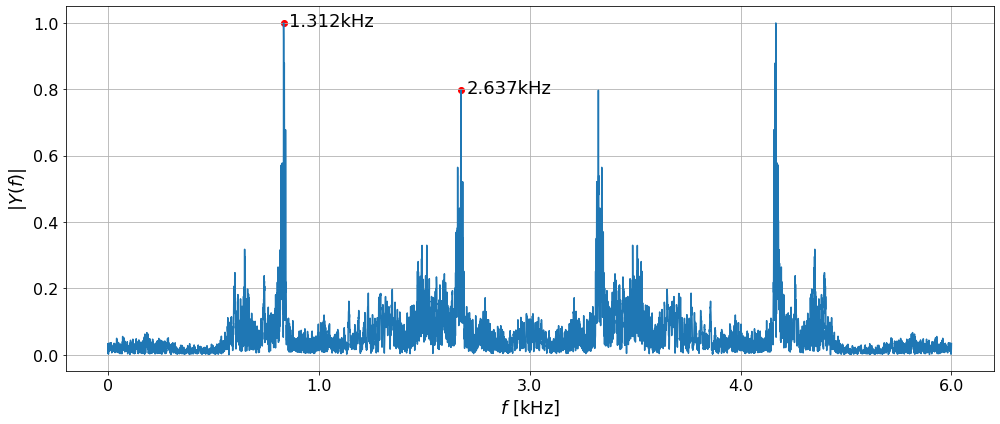

In [149]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f_sub, fft_y_sub)
ax.scatter([f_sub[index_max], f_sub[index_max2]], [fft_y_sub[index_max], fft_y_sub[index_max2]], c='r')
ax.annotate(f'{f_sub[index_max]/1000:.3f}kHz', (f_sub[index_max] + 300/7, fft_y_sub[index_max] - 2/3/10/7), fontsize=18)
ax.annotate(f'{f_sub[index_max2]/1000:.3f}kHz', (f_sub[index_max2] + 300/7, fft_y_sub[index_max2] - 2/3/10/7), fontsize=18)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[0, fs/7//2, fs/7, 3*fs/7//2, 2*fs/7],
    labels=[0, fs/7//2//1000, fs/7//1000, 3*fs/7//2//1000, 2*fs/7//1000],
    fontsize=16
)
fig.tight_layout()
fig.show()

<ipython-input-148-237625524672>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


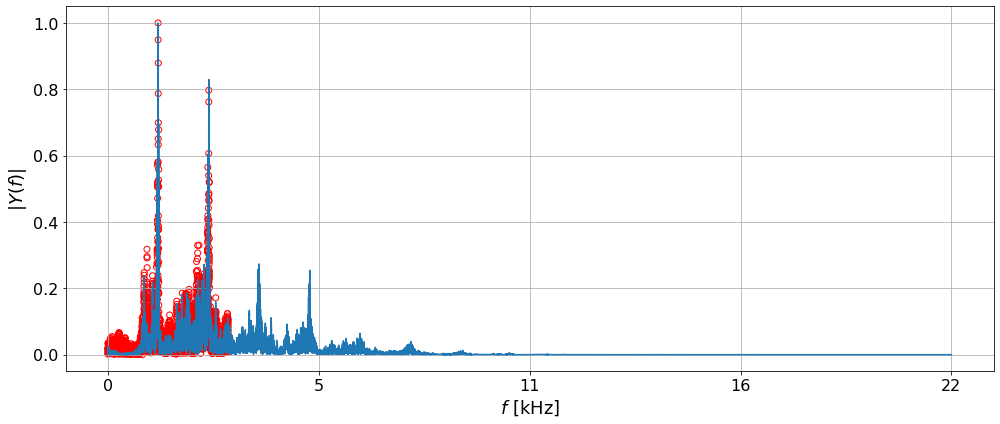

In [148]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f, fft_y)
ax.scatter(f_sub[:f_sub.size//2], fft_y_sub[:f_sub.size//2], facecolors='none', edgecolors='r')
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[0, fs//4, fs//2, 3*fs//4, fs],
    labels=[0, fs//4//1000, fs//2//1000, 3*fs//4//1000, fs//1000],
    fontsize=16
)
fig.tight_layout()
fig.show()

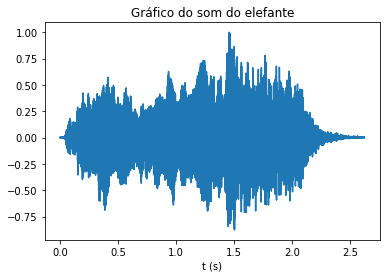

In [8]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.title('Gráfico do som do elefante')
plt.xlabel('t (s)');

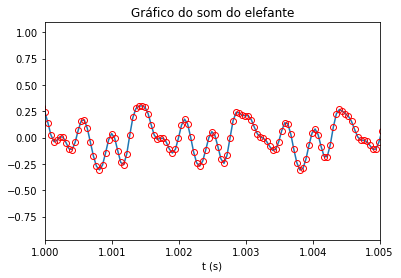

In [9]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none')
plt.title('Gráfico do som do elefante')
plt.xlabel('t (s)');
plt.xlim((1,1.005));

In [10]:
subamostrado = som[::7]

fs_nova = 

ipd.Audio(subamostrado,rate=int(fs_nova))

SyntaxError: invalid syntax (<ipython-input-10-9ee2e7aa7776>, line 3)